# Forecast

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import m5.config as cfg
from m5.model import train, predict
from m5.evaluate import accuracy
from m5.plot import plot_fcst

# Library settings
pd.options.display.max_columns = 999
plt.rcParams["figure.figsize"] = (14, 4)

## Parameters

In [3]:
level = 1

In [4]:
# Parameters
level = 4


## Train

In [5]:
params = {
    "task": "train",
    "objective": "tweedie",
    "num_iterations": 1000,
    "learning_rate": 0.1,
    "num_leaves": 31,
    "num_threads": 4,
    "early_stopping_round": 100,
}

In [6]:
train(cfg.DATA_DIR, cfg.MODEL_DIR, level, params)

Training model...
[LightGBM] [Info] Load from binary file /home/ariel/Playground/m5-forecasting/data/processed/datasets/4/train.bin
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5482
[LightGBM] [Info] Number of data points in the train set: 5532, number of used features: 26
[LightGBM] [Info] Start training from score 9.347406
[1]	valid_0's tweedie: 470.955
Training until validation scores don't improve for 100 rounds
[2]	valid_0's tweedie: 465.578
[3]	valid_0's tweedie: 461.114
[4]	valid_0's tweedie: 457.494
[5]	valid_0's tweedie: 454.505
[6]	valid_0's tweedie: 452.035
[7]	valid_0's tweedie: 449.984
[8]	valid_0's tweedie: 448.302
[9]	valid_0's tweedie: 446.9
[10]	valid_0's tweedie: 445.786
[11]	valid_0's tweedie: 444.861
[12]	valid_0's tweedie: 444.145
[13]	valid_0's tweedie: 443.526
[14]	valid_0's tweedie: 443.037
[15]	valid_0's tweedie: 4

/home/ariel/anaconda3/envs/merlion/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/home/ariel/anaconda3/envs/merlion/lib/python3.9/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[281]	valid_0's tweedie: 440.359
[282]	valid_0's tweedie: 440.358
[283]	valid_0's tweedie: 440.358
[284]	valid_0's tweedie: 440.358
[285]	valid_0's tweedie: 440.359
[286]	valid_0's tweedie: 440.359
[287]	valid_0's tweedie: 440.359
[288]	valid_0's tweedie: 440.359
[289]	valid_0's tweedie: 440.359
[290]	valid_0's tweedie: 440.358
[291]	valid_0's tweedie: 440.358
[292]	valid_0's tweedie: 440.358
[293]	valid_0's tweedie: 440.358
[294]	valid_0's tweedie: 440.358
[295]	valid_0's tweedie: 440.358
[296]	valid_0's tweedie: 440.358
[297]	valid_0's tweedie: 440.358
[298]	valid_0's tweedie: 440.358
[299]	valid_0's tweedie: 440.358
[300]	valid_0's tweedie: 440.358
[301]	valid_0's tweedie: 440.358
[302]	valid_0's tweedie: 440.358
[303]	valid_0's tweedie: 440.358
[304]	valid_0's tweedie: 440.358
[305]	valid_0's tweedie: 440.358
[306]	valid_0's tweedie: 440.358
[307]	valid_0's tweedie: 440.358
[308]	valid_0's tweedie: 440.358
[309]	valid_0's tweedie: 440.358
[310]	valid_0's tweedie: 440.359
[311]	vali

## Predict

In [7]:
fcst = predict(cfg.DATA_DIR, cfg.MODEL_DIR, cfg.FCST_DIR, level)
fcst

,cat_id,d,sales,fcst
5655,0,1886,23285,23213.835257
5658,0,1887,22191,21899.386481
5661,0,1888,21017,22223.565453
5664,0,1889,22127,23100.642619
5667,0,1890,28627,26954.149616
...,...,...,...,...
5726,2,1909,8239,7904.667438
5729,2,1910,8363,8333.790747
5732,2,1911,9728,9838.551447
5735,2,1912,12248,12280.035669


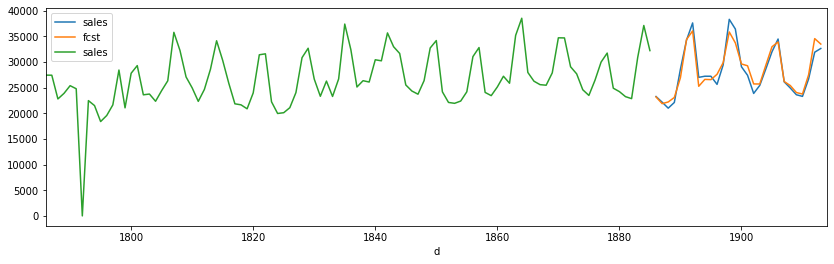

In [8]:
plot_fcst(cfg.DATA_DIR, cfg.FCST_DIR, level=level)

## Evaluate

In [9]:
accuracy_df = accuracy(cfg.DATA_DIR, cfg.FCST_DIR, cfg.METRICS_DIR, level)
accuracy_df

,cat_id,mse_fcst,mse_naive_insample,weights,msse,rmsse,wrmsse
0,0,1.683113e+06,1.635292e+07,0.569701,0.102924,0.320818,0.182771
1,1,1.125680e+05,3.426265e+05,0.128669,0.328544,0.573188,0.073752
2,2,3.667121e+05,2.228167e+06,0.301629,0.164580,0.405685,0.122367


In [10]:
accuracy_df["weights"].sum()

1.0000001

In [11]:
accuracy_df["wrmsse"].sum()

0.37888873146025304

## Misc